# This script contains the following:
### 1. Importing Visualization Libraries and Data
### 2. Exploring Relationship
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
path = r'C:\Users\fairo\Downloads\London Airbnb'

In [17]:
df = pd.read_csv(os.path.join(path, 'listings_clean.csv' ), index_col = 0)

### 2. Exploring Relationships

### Correlations

In [18]:
df.head()

,listing_id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,13913,Holiday London DB Room Let-on going,54730,Alina,Islington,51.56802,-0.11121,Private room,65,1,16,6/10/2019,0.15,3,347
1,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100,3,85,5/5/2019,0.73,1,203
2,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,Westminster,51.52098,-0.14002,Entire home/apt,300,3,41,6/19/2019,0.41,14,269
3,24328,Battersea bedroom & office w parking shared ga...,41759,Joe,Wandsworth,51.47298,-0.16376,Entire home/apt,175,30,93,6/8/2019,0.88,1,329
4,25023,All-comforts 2-bed flat near Wimbledon tennis,102813,Amanda,Wandsworth,51.44687,-0.21874,Entire home/apt,65,4,28,6/22/2019,0.69,1,2


In [25]:
# Changing data type
df['listing_id'] = df['listing_id'].astype('str')

In [26]:
df['host_id'] = df['host_id'].astype('str')

In [27]:
df.dtypes

listing_id                         object
name                               object
host_id                            object
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [34]:
df.columns

Index(['listing_id', 'name', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [45]:
sub = df[['latitude', 'longitude', 'price', 'minimum_nights','number_of_reviews', 'calculated_host_listings_count', 'availability_365']]

In [46]:
sub

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,51.56802,-0.11121,65,1,16,3,347
1,51.48796,-0.16898,100,3,85,1,203
2,51.52098,-0.14002,300,3,41,14,269
3,51.47298,-0.16376,175,30,93,1,329
4,51.44687,-0.21874,65,4,28,1,2
...,...,...,...,...,...,...,...
83845,51.53057,-0.18423,100,2,0,1,209
83846,51.52301,-0.08979,82,14,0,18,35
83847,51.52301,-0.08979,78,21,0,18,36
83848,51.52301,-0.08979,82,21,0,18,36


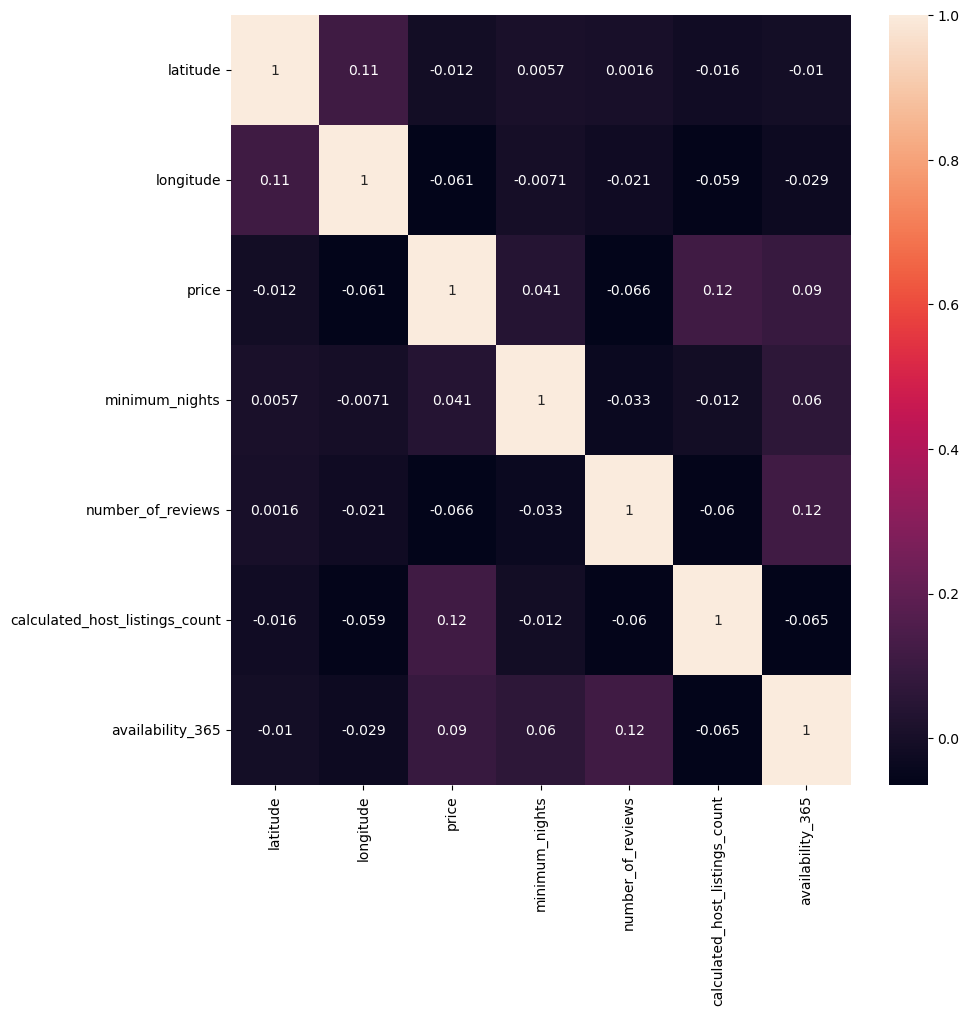

In [44]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

The level of interdependence between these variables varie from no relationship to weak. 

Correlations are a marker of linear interdependence, meaning that if the relationship between two variables isn’t linear, a correlation wouldn’t be an appropriate tool for seeing how those two variables are interconnected. Maybe it's the case here.

### Scatterplots

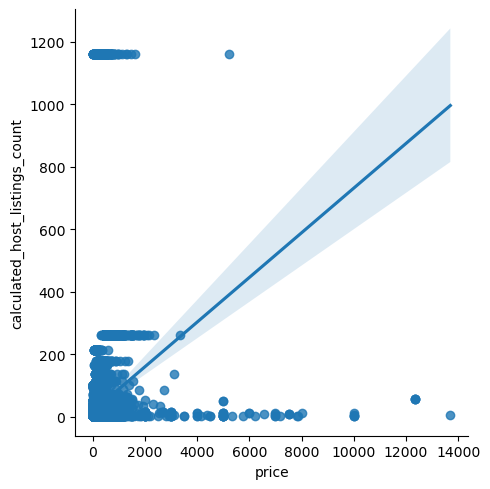

In [47]:
sns.lmplot(x = 'price', y = 'calculated_host_listings_count', data = df)

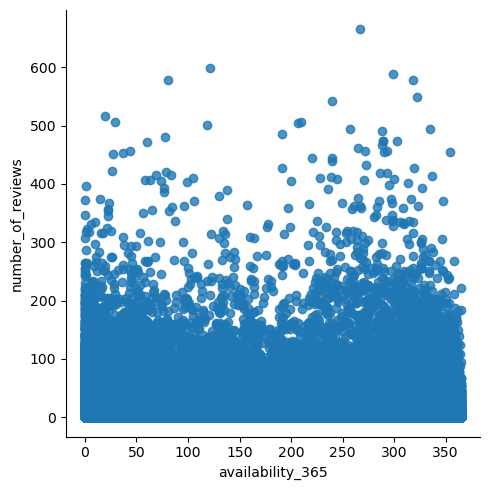

In [48]:
sns.lmplot(x = 'availability_365', y = 'number_of_reviews', data = df)

The scatterplot confirms the postive but week relationship between the price and the number of listings the host has. There are many points away from the line, meaning there are many outliers. 

The correlation coefficient alone isn’t enough to produce a holistic view of the relationship between these two variables.
The Scatterplot has confirmed also the non-linearity and abundance of data variance is what was impacting the correlation coefficient.

### Pair plots

In [49]:
sub_2 = sub[['price', 'minimum_nights','number_of_reviews', 'calculated_host_listings_count', 'availability_365']]

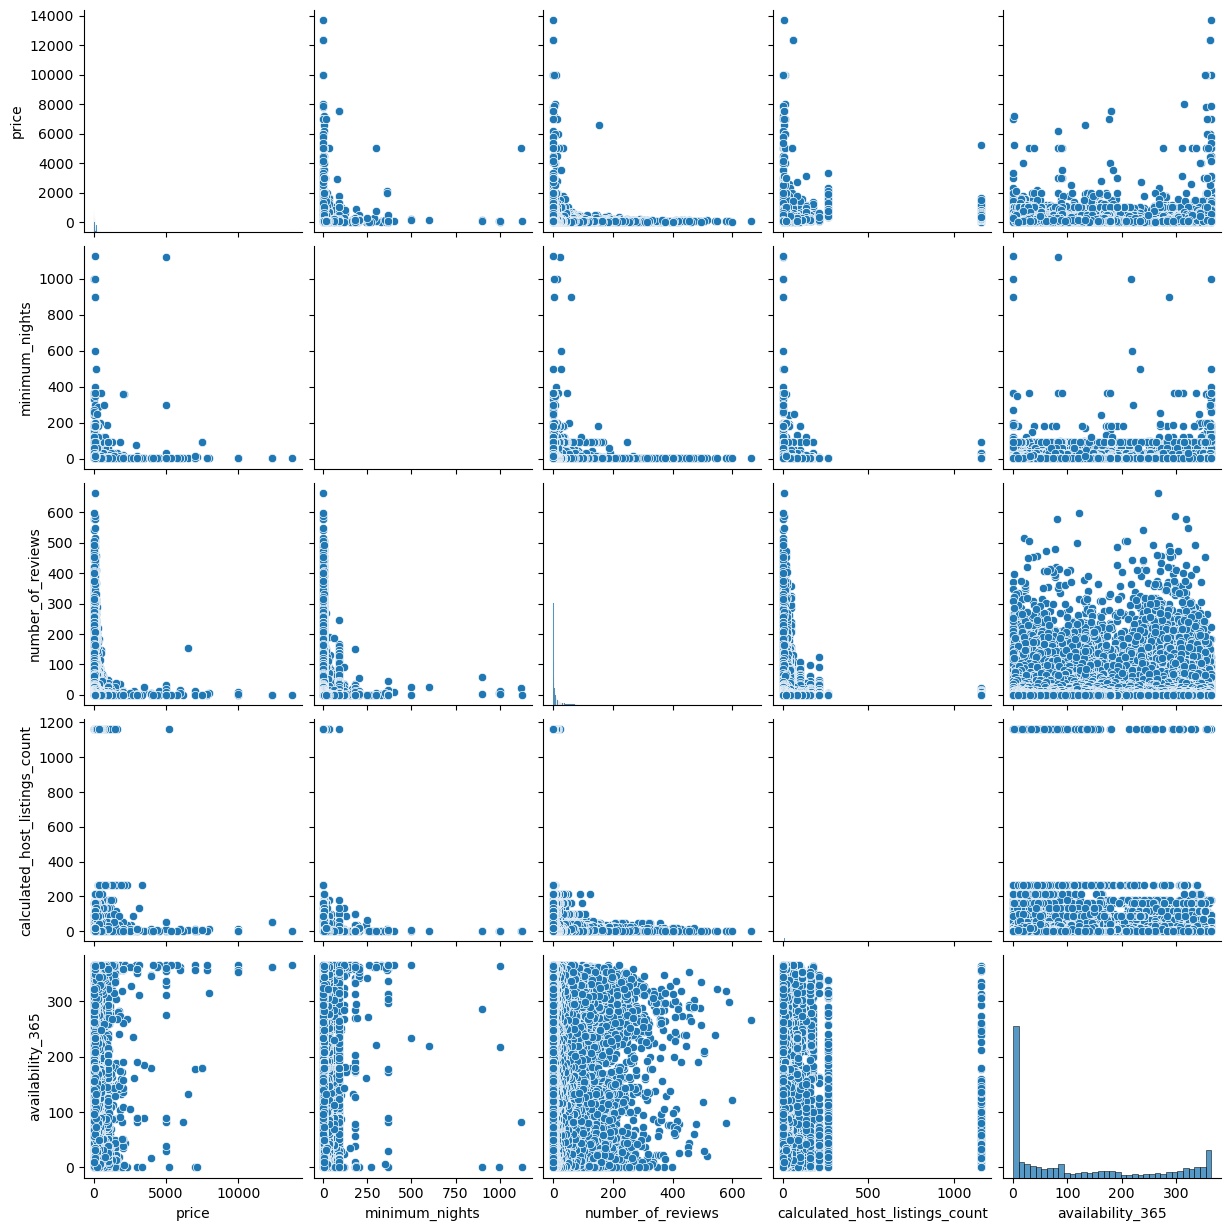

In [50]:
# Create a pair plot 

g = sns.pairplot(sub_2)

### Categorical Plots

<AxesSubplot:xlabel='price', ylabel='Count'>

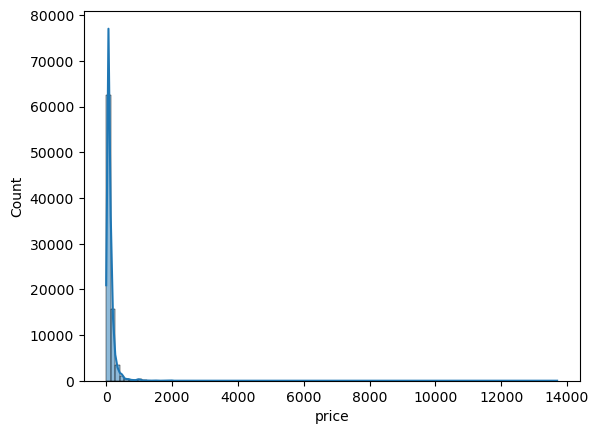

In [64]:
sns.histplot(df['price'], bins = 100, kde = True)

Because of the presence of outliers, the data is spread that there are so many bins that are not visible. To investigate further I must create another subset that excludes the highest values of prices.

In [81]:
df_sub = df.loc[df['price'] < 500]

<AxesSubplot:xlabel='price', ylabel='Count'>

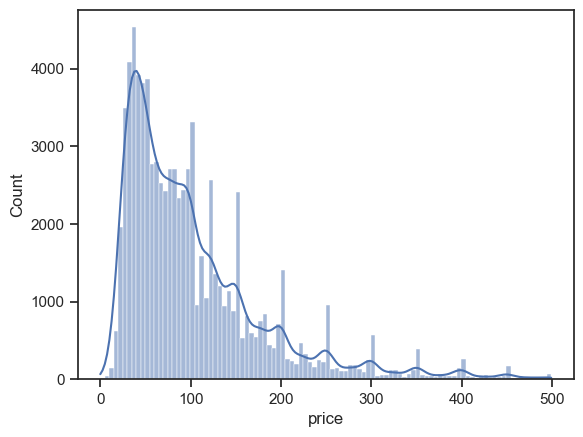

In [82]:
sns.histplot(df_sub['price'], bins = 100, kde = True)

It's definitely clearer and more readable. We can see a right skewed distribution, the peak of the graph lies on the left side of the center, which represent the low to middle prices. 
The higher prices are the outliers here.

In [69]:
df.loc[df['price'] < 100, 'Price category'] = 'low to middle price'

In [68]:
df.loc[(df['price'] >= 100) & (df['price'] < 500), 'Price category'] = 'Expensive'

In [70]:
df.loc[df['price'] >= 500, 'Price category'] = 'Luxury homes'

In [71]:
df['Price category'].value_counts(dropna = False)

low to middle price    49886
Expensive              32160
Luxury homes            1804
Name: Price category, dtype: int64

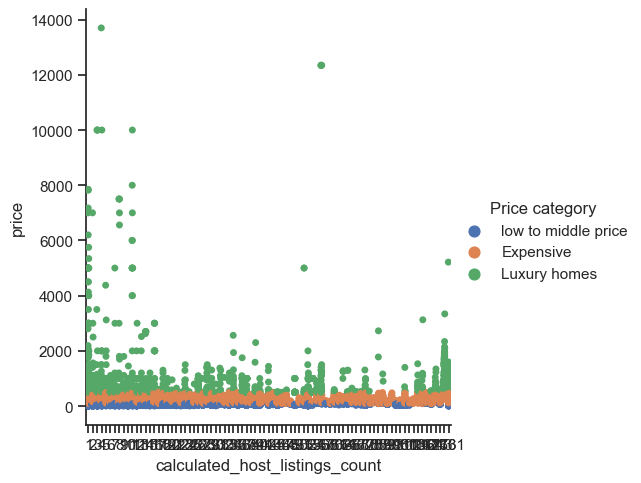

In [86]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="calculated_host_listings_count", y="price", hue="Price category", data=df)

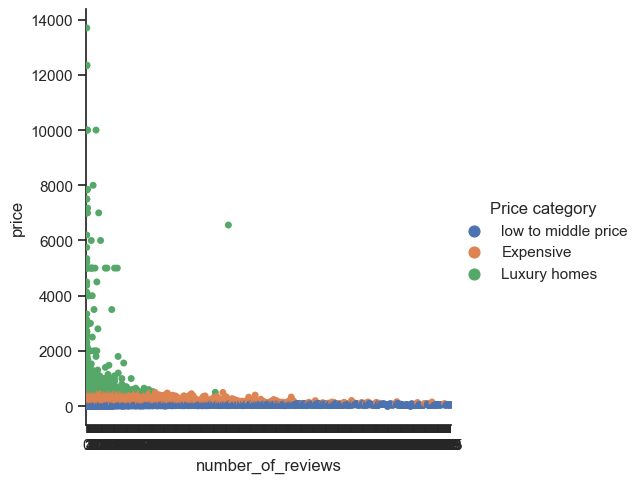

In [85]:
sns.set(style="ticks")
g = sns.catplot(x="number_of_reviews", y="price", hue="Price category", data=df)